## 导包

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

## 读取数据

In [84]:
data_path=r'watermelon3_0_Ch.csv'
data=pd.read_csv(data_path).values
data

array([[1, '青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.46, '是'],
       [2, '乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, '是'],
       [3, '乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, '是'],
       [4, '青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, '是'],
       [5, '浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, '是'],
       [6, '青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, '是'],
       [7, '乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, '是'],
       [8, '乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, '是'],
       [9, '乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, '否'],
       [10, '青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, '否'],
       [11, '浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, '否'],
       [12, '浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, '否'],
       [13, '青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, '否'],
       [14, '浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, '否'],
       [15, '乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.36, 0.37

In [85]:
X=data[:,7:9].astype(float)
y=data[:,9]
y[y=='是']=1
y[y=='否']=0
y=y.astype(int)
X,y,X.shape

(array([[0.697, 0.46 ],
        [0.774, 0.376],
        [0.634, 0.264],
        [0.608, 0.318],
        [0.556, 0.215],
        [0.403, 0.237],
        [0.481, 0.149],
        [0.437, 0.211],
        [0.666, 0.091],
        [0.243, 0.267],
        [0.245, 0.057],
        [0.343, 0.099],
        [0.639, 0.161],
        [0.657, 0.198],
        [0.36 , 0.37 ],
        [0.593, 0.042],
        [0.719, 0.103]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (17, 2))

## 打印数据图

[ True  True  True  True  True  True  True  True False False False False
 False False False False False] [False False False False False False False False  True  True  True  True
  True  True  True  True  True]
[0.697 0.774 0.634 0.608 0.556 0.403 0.481 0.437] [0.46  0.376 0.264 0.318 0.215 0.237 0.149 0.211]
[0.666 0.243 0.245 0.343 0.639 0.657 0.36  0.593 0.719] [0.091 0.267 0.057 0.099 0.161 0.198 0.37  0.042 0.103]


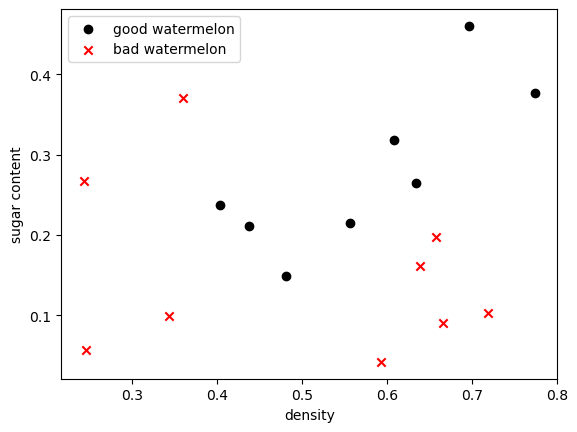

In [86]:
is_good=y==1
is_bad=y==0
print(is_good,is_bad)
print(X[:,0][is_good],X[:,1][is_good])
print(X[:,0][is_bad],X[:,1][is_bad])

plt.xlabel('density')
plt.ylabel('sugar content')
plt.scatter(X[:,0][is_good],X[:,1][is_good],c='k',marker='o',label='good watermelon')
plt.scatter(X[:,0][is_bad],X[:,1][is_bad],c='r',marker='x',label='bad watermelon')
# Matplotlib 中用于添加图例的函数
plt.legend()
plt.show()

## 损失函数

In [87]:
def J_cost(X,y,beta):
    X_hat=np.c_[X,np.ones((X.shape[0],1))]
    beta=beta.reshape(-1,1)
    y=y.reshape(-1,1)
    z=np.dot(X_hat,beta)
    return np.sum(-y*z+np.log(1+np.exp(z)))

## sigmoid函数

In [88]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 梯度

In [89]:
def gradient(X, y, beta):
    X_hat=np.c_[X,np.ones((X.shape[0],1))]
    beta=beta.reshape(-1,1)
    y=y.reshape(-1,1)
    p1=sigmoid(np.dot(X_hat,beta))
    grad=(-X_hat*(y-p1)).sum(0)
    return grad.reshape(-1,1)

## 梯度下降

In [90]:
def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    for i in range(num_iterations):
        grad=gradient(X,y,beta)
        beta=beta-learning_rate*grad
        if (i%100==0) & print_cost==True:
            print('{}th iteration,cost is {}'.format(i,J_cost(X,y,beta)))
    return beta

In [ ]:
def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    for i in range(num_iterations):
        grad=gradient(X,y,beta)
        beta=beta-learning_rate*grad
        if (i%100==0) & print_cost==True:
            print('{}th iteration,cost is {}'.format(i,J_cost(X,y,beta)))
    return beta

In [ ]:
def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    for i in range(num_iterations):
        grad=gradient(X,y,beta)
        beta=beta-learning_rate*grad
        if (i%100==0) & print_cost==True:
            print('{}th iteration,cost is {}'.format(i,J_cost(X,y,beta)))
    return beta

## 初始化beta

In [91]:
def initialize_beta(n):
    return np.random.rand(n+1,1)*0.5+1

## 逻辑回归

In [92]:
def logistic_model(X, y, num_iterations=100, learning_rate=1.2, print_cost=False, method='gradDesc'):
    beta=initialize_beta(X.shape[1])
    print('这是初始化的beta:{}'.format(beta))
    if method=='gradDesc':
        return update_parameters_gradDesc(X,y, beta, learning_rate, num_iterations, print_cost)
    elif method=='newton':
        return update_parameters_newton(X,y, beta, learning_rate, num_iterations, print_cost)
    else:
        raise ValueError('Unknown method {}'.format(method))

## 线性回归模型

这是初始化的beta:[[1.12880766]
 [1.11090116]
 [1.33482124]]
0th iteration,cost is 11.880812501860705
100th iteration,cost is 8.97334816341929
200th iteration,cost is 8.747883201071488
300th iteration,cost is 8.7010613484869
400th iteration,cost is 8.688806777178778
500th iteration,cost is 8.685249951237711
600th iteration,cost is 8.684162791217426
700th iteration,cost is 8.683821261758458
800th iteration,cost is 8.683712349609204
900th iteration,cost is 8.683677326615129
这是最后的beta:[[ 3.152474  ]
 [12.49898058]
 [-4.42115747]]


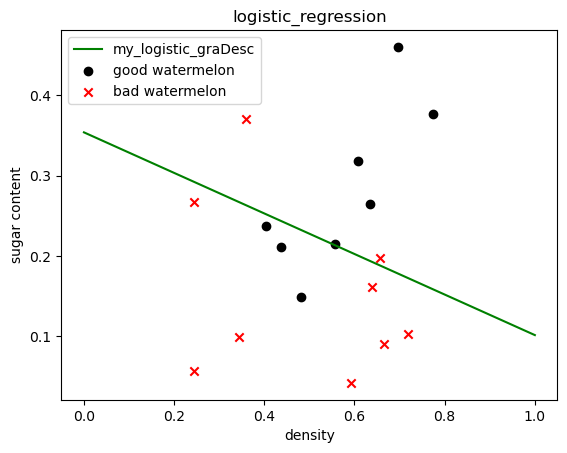

In [94]:
beta=logistic_model(X,y,num_iterations=1000,learning_rate=0.3,print_cost=True,method='gradDesc')
print('这是最后的beta:{}'.format(beta))
w1,w2,b=beta
x1=np.linspace(0,1)
x2=-(w1*x1+b)/w2

plt.xlabel('density')
plt.ylabel('sugar content')
plt.title('logistic_regression')
plt.plot(x1,x2,color='green',linestyle='-',label='my_logistic_graDesc')
plt.scatter(X[:,0][is_good],X[:,1][is_good],c='k',marker='o',label='good watermelon')
plt.scatter(X[:,0][is_bad],X[:,1][is_bad],c='r',marker='x',label='bad watermelon')
# Matplotlib 中用于添加图例的函数
plt.legend()
plt.show()

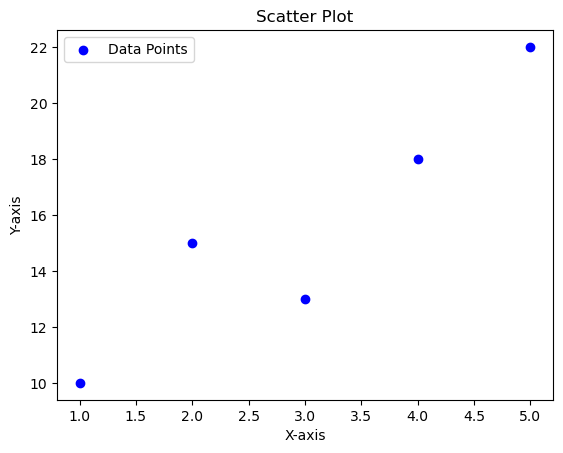

In [46]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 18, 22]

plt.scatter(x, y, color='blue', marker='o', label='Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
plt.legend()
plt.show()


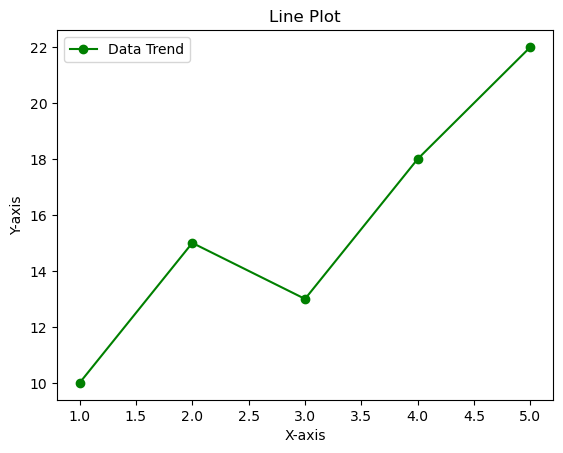

In [30]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 18, 22]

plt.plot(x, y, color='green', linestyle='-', marker='o', label='Data Trend')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.legend()
plt.show()
